In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
import statsmodels.graphics.gofplots as gofplots
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import itertools

In [2]:
from google.colab import files
uploaded=files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [3]:
df=pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.tail()

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [5]:
df.shape

(7588, 2)

In [6]:
df.size

15176

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [8]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [9]:
df.isnull().sum()

,0
date,0
Ex_rate,0


In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

,0
date,object
Ex_rate,float64


In [12]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

In [13]:
df.set_index('date', inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [15]:
df.dtypes

,0
Ex_rate,float64


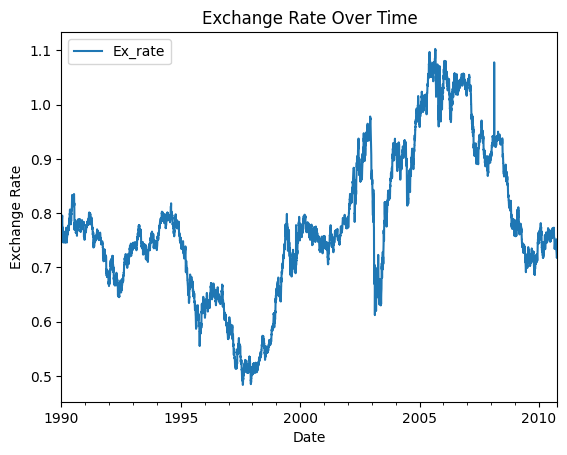

In [16]:
df.plot()
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [17]:
result=seasonal_decompose(df['Ex_rate'],model='additive')

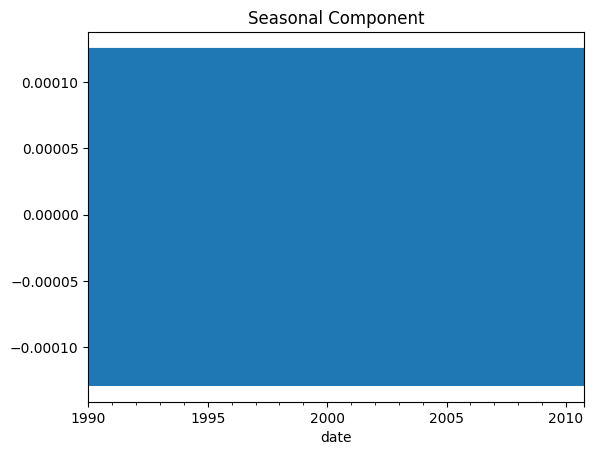

In [18]:
result.seasonal.plot()
plt.title('Seasonal Component')
plt.show()

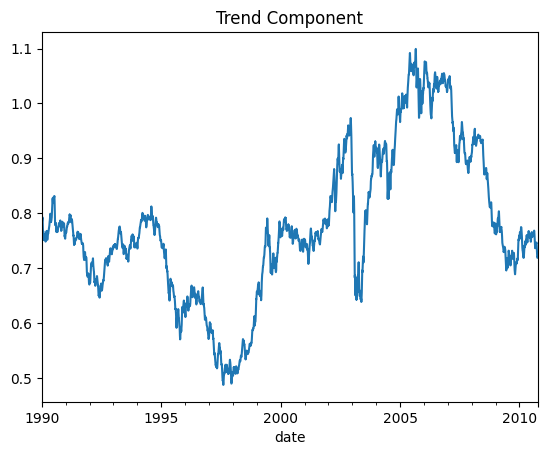

In [19]:
result.trend.plot()
plt.title('Trend Component')
plt.show()

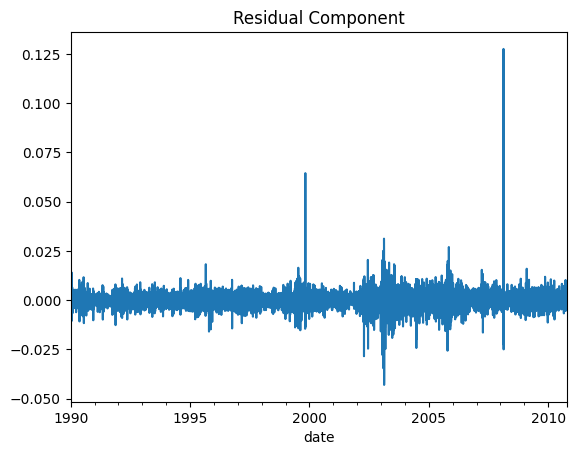

In [20]:
result.resid.plot()
plt.title('Residual Component')
plt.show()

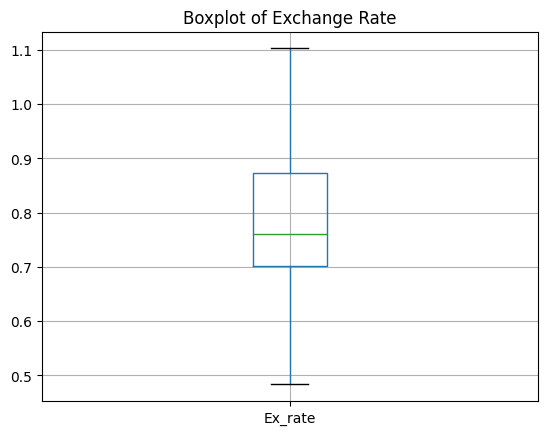

In [21]:
df.boxplot()
plt.title('Boxplot of Exchange Rate')
plt.show()

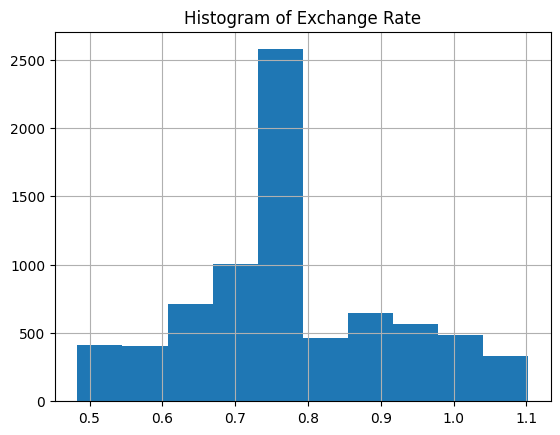

In [22]:
df.hist()
plt.title('Histogram of Exchange Rate')
plt.show()

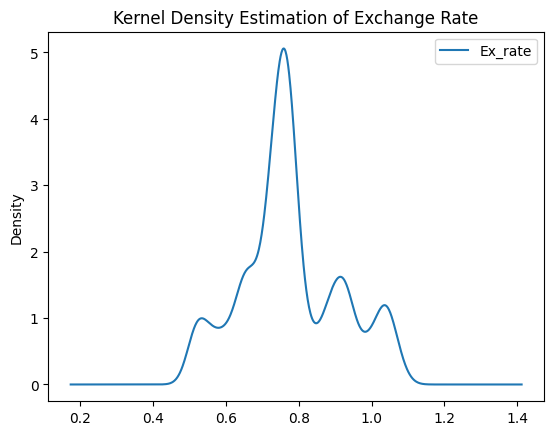

In [23]:
df.plot(kind='kde')
plt.title('Kernel Density Estimation of Exchange Rate')
plt.show()

# ARIMA


In [24]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


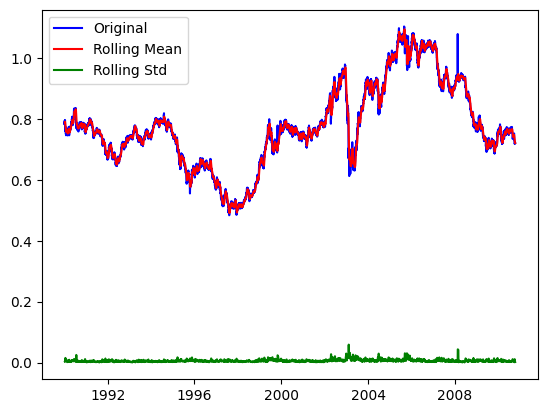

In [25]:
test_stationarity(df['Ex_rate'])

 Differencing

In [26]:
df['Ex_rate_diff'] = df['Ex_rate'].diff()


In [27]:
df.dropna(inplace=True)

Results of Dickey-Fuller Test :

Test Statistic                  -99.393431
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


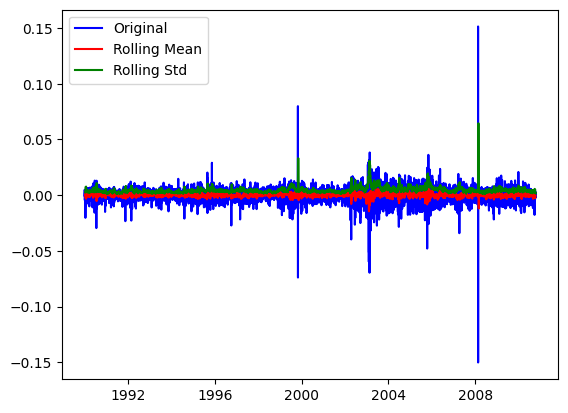

In [28]:
test_stationarity(df['Ex_rate_diff'])

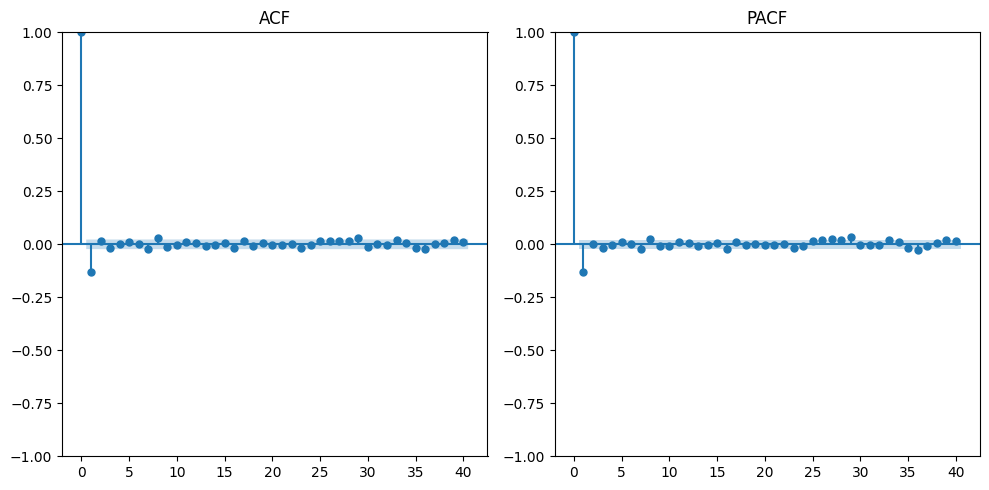

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_acf(df['Ex_rate_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF')
plt.subplot(1, 2, 2)
plot_pacf(df['Ex_rate_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF')
plt.tight_layout()
plt.show()

In [30]:
model=ARIMA(df['Ex_rate'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28050.093
Date:                Mon, 18 Nov 2024   AIC                         -56094.186
Time:                        16:17:20   BIC                         -56073.384
Sample:                    01-02-1990   HQIC                        -56087.047
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1270      0.045     -2.801      0.005      -0.216      -0.038
ma.L1         -0.0044      0.045     -0.097      0.923      -0.094       0.085
sigma2      3.596e-05   9.95e-08    361.568      0.0

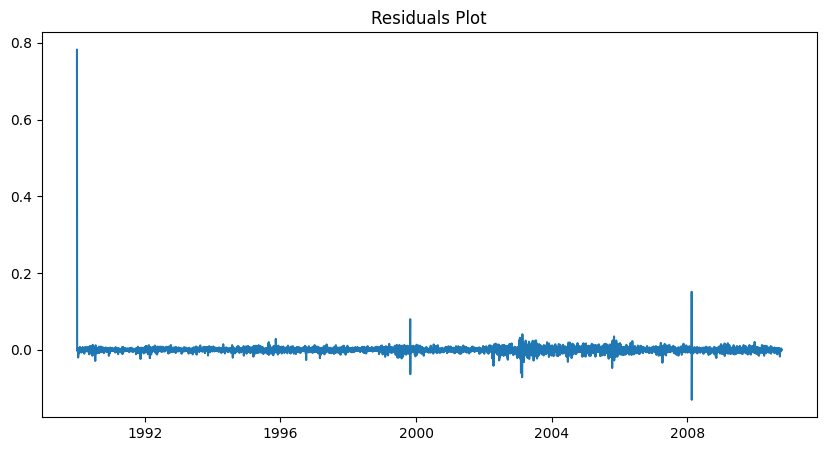

In [32]:
residuals=model_fit.resid
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.show()

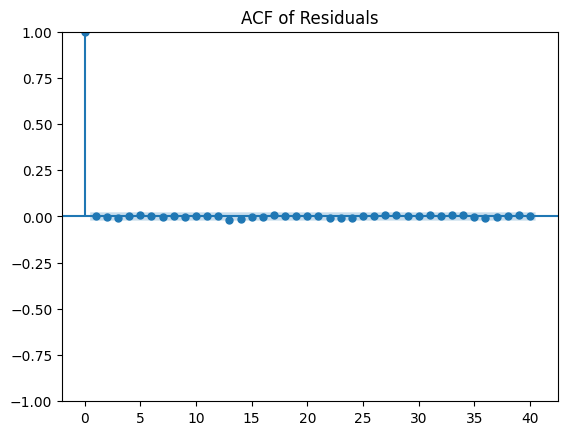

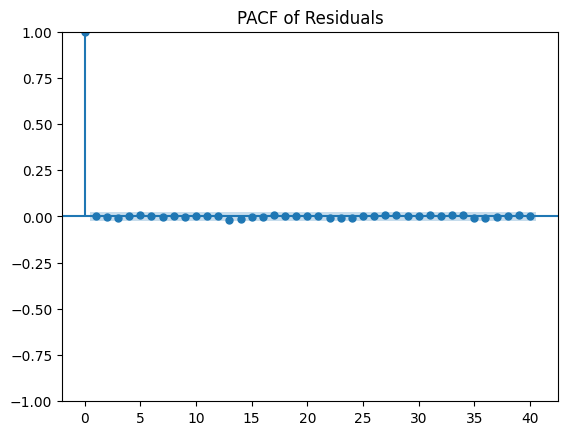

In [33]:
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

plot_pacf(residuals, lags=40)
plt.title('PACF of Residuals')
plt.show()

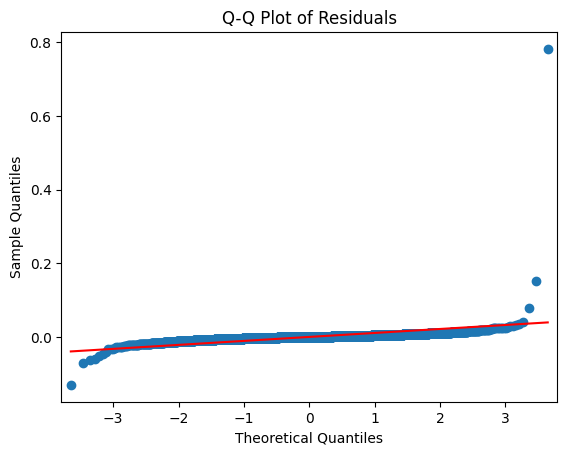

In [34]:
gofplots.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [35]:
# Perform normality test (e.g., Shapiro-Wilk test)
from scipy.stats import shapiro
statistic, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic = {statistic}, p-value = {p_value}")

Shapiro-Wilk Test: Statistic = 0.28422251137958543, p-value = 4.916243007552027e-99


In [36]:
print(model_fit.aic, model_fit.bic)

-56094.186169688204 -56073.383990521455


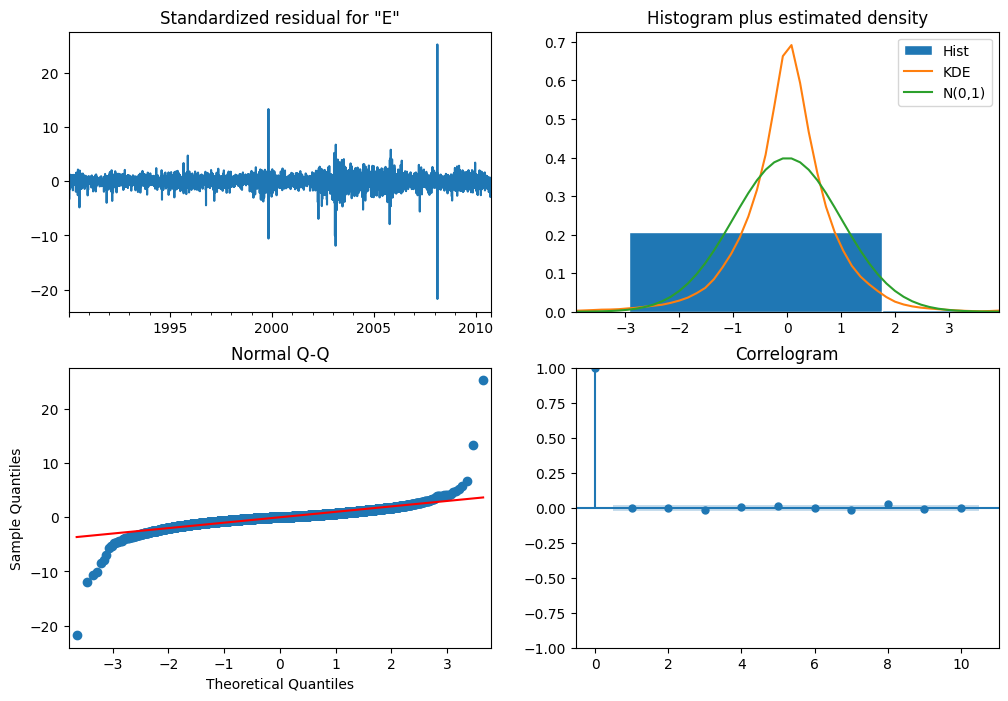

In [37]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [38]:
# Calculate the split index
train_size = int(len(df) * 0.8)

In [39]:
# Split the data
train_data = df['Ex_rate'][:train_size]
test_data = df['Ex_rate'][train_size:]

In [40]:
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [41]:
forecast = model_fit.forecast(steps=len(test_data))

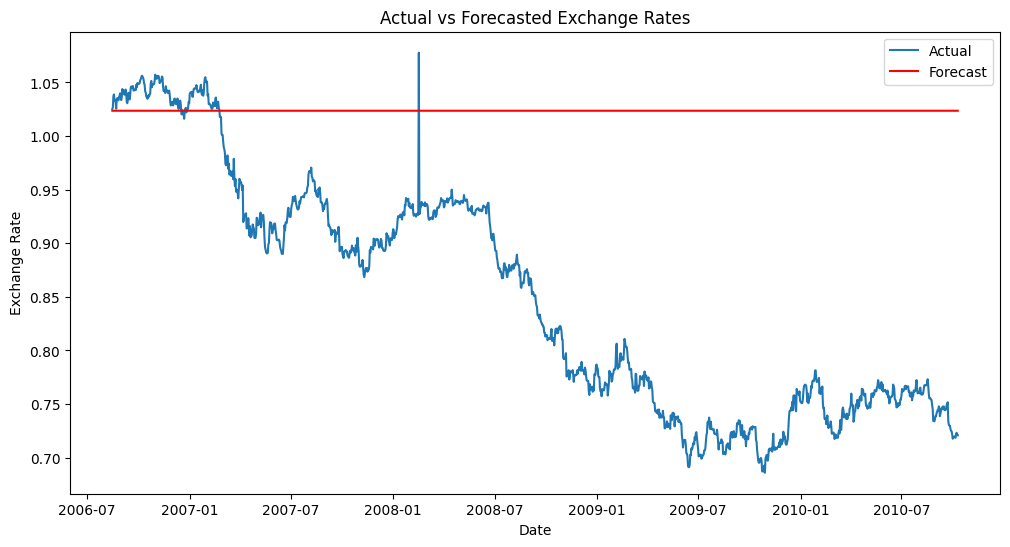

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Actual vs Forecasted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [43]:
mse_arima = np.sqrt(mean_squared_error(test_data, forecast))
mae_arima = mean_absolute_error(test_data, forecast)
mape_arima = np.mean(np.abs((test_data - forecast) / test_data)) * 100

print(f"ARIMA - MSE: {mse_arima}, MAE: {mae_arima}, MAPE: {mape_arima}")

ARIMA - MSE: 0.20543683411338648, MAE: 0.1777098270297431, MAPE: 22.797981767708407


# Exponential Smoothing

In [44]:
Exp_df=pd.read_csv('exchange_rate.csv')
Exp_df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [45]:
Exp_df['date'] = pd.to_datetime(Exp_df['date'], format='%d-%m-%Y %H:%M')

In [46]:
Exp_df.set_index('date', inplace=True)

In [47]:
Exp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


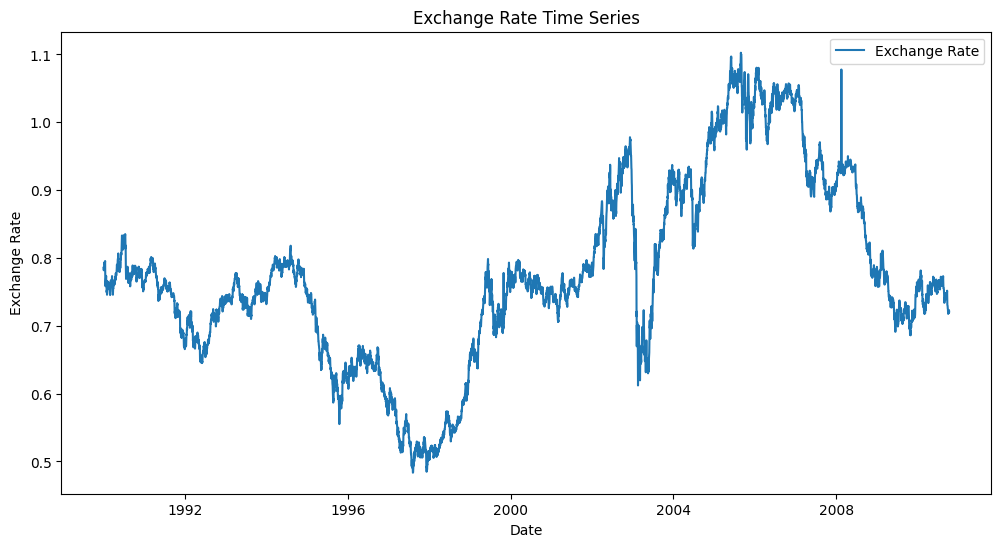

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(Exp_df.index, Exp_df['Ex_rate'], label='Exchange Rate')
plt.title("Exchange Rate Time Series")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [49]:
train_size=int(len(Exp_df)*0.8)
train_data=Exp_df['Ex_rate'][:train_size]
test_data=Exp_df['Ex_rate'][train_size:]

In [50]:
# Fit Holt's Linear Trend Model
holt_model=ExponentialSmoothing(train_data,trend='add',seasonal=None).fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [51]:
holt_model.summary()

Dep. Variable:,Ex_rate,No. Observations:,6070
Model:,ExponentialSmoothing,SSE,0.199
Optimized:,True,AIC,-62655.290
Trend:,Additive,BIC,-62628.446
Seasonal:,None,AICC,-62655.276
Seasonal Periods:,None,Date:,"Mon, 18 Nov 2024"
Box-Cox:,False,Time:,16:17:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9460679,alpha,True
smoothing_trend,2.5147e-05,beta,True


In [52]:
# Forecast
holt_forecast = holt_model.forecast(steps=len(test_data))

In [53]:
# Print model parameters
print(holt_model.params)

{'smoothing_level': 0.9460679335377332, 'smoothing_trend': 2.5147271418830443e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.784155194324485, 'initial_trend': 1.2883658814922953e-05, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


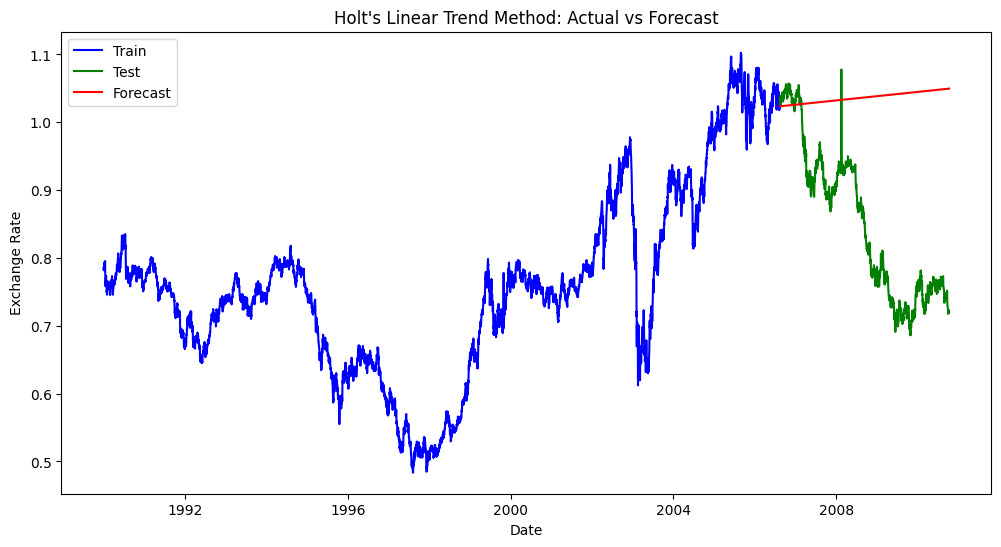

In [54]:
# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label="Train", color="blue")
plt.plot(test_data.index, test_data, label="Test", color="green")
plt.plot(test_data.index, holt_forecast, label="Forecast", color="red")
plt.title("Holt's Linear Trend Method: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [56]:
# Calculate error metrics
mae_holt = mean_absolute_error(test_data, holt_forecast)
mse_holt = np.sqrt(mean_squared_error(test_data, holt_forecast))
mape_holt = np.mean(np.abs((test_data - forecast) / test_data)) * 100

print(f"Mean Absolute Error (MAE): {mae_holt}")
print(f"Mean Squared Error (MSE): {mse_holt}")
print(f"MAPE': {mape_holt}")

Mean Absolute Error (MAE): 0.19027267219127425
Mean Squared Error (MSE): 0.22008426144336735
MAPE': 22.797981767708407


In [57]:
# Define ranges for alpha and beta
alpha = [0.1, 0.2, 0.3, 0.5,0.6,0.7,0.8,0.9]
beta = [0.1, 0.2, 0.3, 0.5]

In [58]:
# Grid Search
results = []
for a, b in itertools.product(alpha, beta):
    try:
        model = ExponentialSmoothing(train_data, trend="add", seasonal=None)
        fit_model = model.fit(smoothing_level=a, smoothing_slope=b, optimized=False)
        forecast = fit_model.forecast(steps=len(test_data))
        mse = mean_squared_error(test_data, forecast)
        results.append((a, b, mse))
    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [59]:
# Best Parameters
best_params = min(results, key=lambda x: x[2])
print(f"Best Parameters: α={best_params[0]}, β={best_params[1]}, MSE={best_params[2]}")

Best Parameters: α=0.3, β=0.2, MSE=0.004251416339842529


**Model Comparison**

**Performance:**

Based on the observed error metrics:

ARIMA:

Strength: Captures autocorrelations and is effective for stationary data.

Performance:
Lower RMSE or MAPE may suggest better predictive accuracy, particularly for short-term forecasting.

Use Case: Suitable when the series shows strong autoregressive or moving-average patterns.

Holt’s Linear Trend:

Strength: Handles non-stationary data with a clear trend but no seasonality.

Performance:
Lower MAE might indicate robustness against outliers.

Use Case: Works well for data with smooth trends without complex seasonal or cyclic patterns.

**Advantages**

ARIMA:
Flexible and capable of modeling various time series characteristics (e.g., lags, shocks).
Performs well when fine-tuned to data characteristics (e.g., with AIC/BIC optimization).

Holt’s Linear Trend:
Simpler and faster to train compared to ARIMA.
Less sensitive to preprocessing steps like differencing or stationarity checks.

**Limitations**

ARIMA:
Requires stationarity; differencing may sometimes over-simplify or lose information.
Sensitive to parameter tuning, which can increase computational effort.

Holt’s Linear Trend:
Ignores autocorrelation patterns that might exist in the residuals.
Fails to model seasonality if present in the data.